In [1]:
import pandas as pd
import numpy as np
from scipy.signal import argrelextrema
import matplotlib.pyplot as plt
from untrade.client import Client

In [2]:
data = pd.read_csv(
    '/Users/tejasmacipad/Desktop/Final_inter_IIT_submission/BTC/BTC_2019_2023_30m.csv',
    parse_dates=['datetime'],  # Parse the 'datetime' column as datetime
    index_col='datetime'       # Use 'datetime' as the index
)

print(data.head())

                     Unnamed: 0      open      high       low     close  \
datetime                                                                  
2019-09-08 17:30:00           0  10000.00  10000.00  10000.00  10000.00   
2019-09-08 18:00:00           1  10000.00  10000.00  10000.00  10000.00   
2019-09-08 18:30:00           2  10000.00  10000.00  10000.00  10000.00   
2019-09-08 19:00:00           3  10344.77  10357.53  10342.90  10354.62   
2019-09-08 19:30:00           4  10354.62  10357.35  10337.43  10340.12   

                      volume  
datetime                      
2019-09-08 17:30:00    0.002  
2019-09-08 18:00:00    0.000  
2019-09-08 18:30:00    0.000  
2019-09-08 19:00:00  136.177  
2019-09-08 19:30:00  335.482  


In [3]:
Data = data.drop_duplicates(keep=False)
data = Data[["close"]].copy()
print(data.head())

                        close
datetime                     
2019-09-08 17:30:00  10000.00
2019-09-08 18:00:00  10000.00
2019-09-08 18:30:00  10000.00
2019-09-08 19:00:00  10354.62
2019-09-08 19:30:00  10340.12


Part - II

Butterfly Pattern

In [4]:


class HarmonicPatternDetector:
    def __init__(self, data, order_dec=5, err_allowed=0.1):
        self.data = data
        self.order_dec = order_dec
        self.err_allowed = err_allowed
        self.patterns = []

    def detect_patterns(self):
        price = self.data.close.copy()
        for i in range(200, len(price)):
            max_idx = list(argrelextrema(price.values[:i], np.greater, order=self.order_dec)[0])
            min_idx = list(argrelextrema(price.values[:i], np.less, order=self.order_dec)[0])
            idx = max_idx + min_idx + [len(price.values[:i])-1]
            idx.sort()

            current_idx = idx[-5:]
            current_pat = price.values[current_idx]

            self._check_bullish_butterfly(current_idx, current_pat)
            self._check_bearish_butterfly(current_idx, current_pat)
            # Add other patterns here as needed

    def _check_bullish_butterfly(self, current_idx, current_pat):
        XA, AB, BC, CD = self._calculate_segments(current_pat)
        if XA > 0 and AB < 0 and BC > 0 and CD < 0:
            if self._is_within_ranges(XA, AB, BC, CD):
                self._add_pattern('Bullish Butterfly', current_idx, current_pat)

    def _check_bearish_butterfly(self, current_idx, current_pat):
        XA, AB, BC, CD = self._calculate_segments(current_pat)
        if XA < 0 and AB > 0 and BC < 0 and CD > 0:
            if self._is_within_ranges(XA, AB, BC, CD):
                self._add_pattern('Bearish Butterfly', current_idx, current_pat)

    def _calculate_segments(self, current_pat):
        XA = float(current_pat[1] - current_pat[0])
        AB = float(current_pat[2] - current_pat[1])
        BC = float(current_pat[3] - current_pat[2])
        CD = float(current_pat[4] - current_pat[3])
        return XA, AB, BC, CD

    def _is_within_ranges(self, XA, AB, BC, CD):
        AB_range = np.array([0.786 - self.err_allowed, 0.786 + self.err_allowed]) * abs(XA)
        BC_range = np.array([0.382 - self.err_allowed, 0.886 + self.err_allowed]) * abs(AB)
        CD_range = np.array([1.618 - self.err_allowed, 2.618 + self.err_allowed]) * abs(BC)

        abs_AB = abs(AB)
        abs_BC = abs(BC)
        abs_CD = abs(CD)

        return (AB_range[0] < abs_AB < AB_range[1] and 
                BC_range[0] < abs_BC < BC_range[1] and 
                CD_range[0] < abs_CD < CD_range[1])

    def _add_pattern(self, pattern_type, current_idx, current_pat):
        self.patterns.append({
            'type': pattern_type,
            'start': min(current_idx),
            'end': max(current_idx),
            'points': current_pat,
            'indices': current_idx
        })

    def get_patterns(self):
        return self.patterns

# Usage
detector = HarmonicPatternDetector(data, order_dec=10, err_allowed=0.1)
detector.detect_patterns()
patterns = detector.get_patterns()

Butterfly Pattern

In [5]:
#error_allowed is to tolerate some range in which the price can move
err_allowed = 0.1


price = data.close.copy()

In [6]:
count_bull_butterfly = 0
count_bear_butterfly = 0


def detect_harmonic_pattern_butterfly(data, order_dec=5, err_allowed=0.1):
    price = data.close.copy()
    patterns_bearish = []
    patterns_bullish = []
    global count_bull_butterfly, count_bear_butterfly
    for i in range(200, len(price)):
        
        max_idx = list(argrelextrema(price.values[:i], np.greater, order=order_dec)[0])
        min_idx = list(argrelextrema(price.values[:i], np.less, order=order_dec)[0])
        idx = max_idx + min_idx + [len(price.values[:i])-1]
        idx.sort()
        
        current_idx = idx[-5:]
        current_pat = price.values[current_idx]
        
        XA = float(current_pat[1] - current_pat[0]) 
        AB = float(current_pat[2] - current_pat[1])
        BC = float(current_pat[3] - current_pat[2])
        CD = float(current_pat[4] - current_pat[3])

        AB_range = np.array([0.786 - err_allowed, 0.786 + err_allowed]) * float(abs(XA))
        BC_range = np.array([0.382 - err_allowed, 0.886 + err_allowed]) * float(abs(AB))
        CD_range = np.array([1.618 - err_allowed, 2.618 + err_allowed]) * float(abs(BC))
        
        abs_AB = float(abs(AB))
        abs_BC = float(abs(BC))
        abs_CD = float(abs(CD))
    
        if XA > 0 and AB < 0 and BC > 0 and CD < 0:
            
            if (AB_range[0] < abs_AB < AB_range[1] and 
                BC_range[0] < abs_BC < BC_range[1] and 
                CD_range[0] < abs_CD < CD_range[1]):
                
                patterns_bullish.append({
                    'start': min(current_idx),
                    'end': max(current_idx),
                    'points': current_pat,
                    'indices': current_idx
                })        
        #bearish count

        elif XA < 0 and AB > 0 and BC < 0 and CD > 0:
            
            if (AB_range[0] < abs_AB < AB_range[1] and 
                BC_range[0] < abs_BC < BC_range[1] and 
                CD_range[0] < abs_CD < CD_range[1]):
                
                patterns_bearish.append({
                    'start': min(current_idx),
                    'end': max(current_idx),
                    'points': current_pat,
                    'indices': current_idx
                })
                

                count_bear_butterfly = count_bear_butterfly + 1
    
    return patterns_bearish, patterns_bullish

patterns_bearish_butterfly, patterns_bullish_butterfly = detect_harmonic_pattern_butterfly(data, order_dec=10, err_allowed=0.1)

In [7]:
def extract_extremes(price_values, i, order_dec):
    max_idx = list(argrelextrema(price_values[:i], np.greater, order=order_dec)[0])
    min_idx = list(argrelextrema(price_values[:i], np.less, order=order_dec)[0])
    idx = max_idx + min_idx + [len(price_values[:i])-1] #adding the index of the last point, so to include in the pattern
    idx.sort() #sorting all the indices
    current_idx = idx[-5:] #these contains last 5 indices
    current_pat = price_values[current_idx] 
    return current_idx, current_pat

def identify_butterfly_patterns(current_idx, current_pat, err_allowed):
    XA = float(current_pat[1] - current_pat[0])
    AB = float(current_pat[2] - current_pat[1])
    BC = float(current_pat[3] - current_pat[2])
    CD = float(current_pat[4] - current_pat[3])

    # Calculate ranges
    AB_range = np.array([0.786 - err_allowed, 0.786 + err_allowed]) * abs(XA)
    BC_range = np.array([0.382 - err_allowed, 0.886 + err_allowed]) * abs(AB)
    CD_range = np.array([1.618 - err_allowed, 2.618 + err_allowed]) * abs(BC)

    abs_AB = abs(AB)
    abs_BC = abs(BC)
    abs_CD = abs(CD)

    patterns_bearish = []
    patterns_bullish = []

    if XA > 0 and AB < 0 and BC > 0 and CD < 0:
        if (AB_range[0] < abs_AB < AB_range[1] and 
            BC_range[0] < abs_BC < BC_range[1] and 
            CD_range[0] < abs_CD < CD_range[1]):
            return 1
    elif XA < 0 and AB > 0 and BC < 0 and CD > 0:
        if (AB_range[0] < abs_AB < AB_range[1] and 
            BC_range[0] < abs_BC < BC_range[1] and 
            CD_range[0] < abs_CD < CD_range[1]):
            return -1

    return np.nan

def identify_grately_patterns(current_idx, current_pat, err_allowed):
    XA = float(current_pat[1] - current_pat[0])
    AB = float(current_pat[2] - current_pat[1])
    BC = float(current_pat[3] - current_pat[2])
    CD = float(current_pat[4] - current_pat[3])

    # Calculate ranges
    AB_range = np.array([0.618 - err_allowed, 0.618 + err_allowed]) * abs(XA)
    BC_range = np.array([0.382 - err_allowed, 0.886 + err_allowed]) * abs(AB)
    CD_range = np.array([1.272 - err_allowed, 1.618 + err_allowed]) * abs(BC)

    abs_AB = abs(AB)
    abs_BC = abs(BC)
    abs_CD = abs(CD)

    patterns_bearish = []
    patterns_bullish = []

    if XA > 0 and AB < 0 and BC > 0 and CD < 0:
        if (AB_range[0] < abs_AB < AB_range[1] and 
            BC_range[0] < abs_BC < BC_range[1] and 
            CD_range[0] < abs_CD < CD_range[1]):
            return 1
    elif XA < 0 and AB > 0 and BC < 0 and CD > 0:
        if (AB_range[0] < abs_AB < AB_range[1] and 
            BC_range[0] < abs_BC < BC_range[1] and 
            CD_range[0] < abs_CD < CD_range[1]):
            return -1

    return np.nan

def identify_cypher_patterns(current_idx, current_pat, err_allowed):
    XA = float(current_pat[1] - current_pat[0])
    AB = float(current_pat[2] - current_pat[1])
    BC = float(current_pat[3] - current_pat[2])
    CD = float(current_pat[4] - current_pat[3])

    #XC using AB and BC

    XC = abs(AB) + abs(BC)

    # Calculate ranges
    AB_range = np.array([0.382 - err_allowed, 0.618 + err_allowed]) * abs(XA)
    BC_range = np.array([1.272 - err_allowed, 1.414 + err_allowed]) * abs(AB)
    CD_range = np.array([0.786- err_allowed, 1.786 + err_allowed]) * abs(XC)

    abs_AB = abs(AB)
    abs_BC = abs(BC)
    abs_CD = abs(CD)

    patterns_bearish = []
    patterns_bullish = []

    if XA > 0 and AB < 0 and BC > 0 and CD < 0:
        if (AB_range[0] < abs_AB < AB_range[1] and 
            BC_range[0] < abs_BC < BC_range[1] and 
            CD_range[0] < abs_CD < CD_range[1]):
            return 1
    elif XA < 0 and AB > 0 and BC < 0 and CD > 0:
        if (AB_range[0] < abs_AB < AB_range[1] and 
            BC_range[0] < abs_BC < BC_range[1] and 
            CD_range[0] < abs_CD < CD_range[1]):
            return -1

    return np.nan


def identify_bat_patterns(current_idx, current_pat, err_allowed):
    XA = float(current_pat[1] - current_pat[0])
    AB = float(current_pat[2] - current_pat[1])
    BC = float(current_pat[3] - current_pat[2])
    CD = float(current_pat[4] - current_pat[3])

    #XC using AB and BC

    

    # Calculate ranges
    AB_range = np.array([0.382 - err_allowed, 0.5 + err_allowed]) * abs(XA)
    BC_range = np.array([0.382 - err_allowed, 0.886 + err_allowed]) * abs(AB)
    CD_range = np.array([1.618- err_allowed, 2.618 + err_allowed]) * abs(BC)

    abs_AB = abs(AB)
    abs_BC = abs(BC)
    abs_CD = abs(CD)

    patterns_bearish = []
    patterns_bullish = []

    if XA > 0 and AB < 0 and BC > 0 and CD < 0:
        if (AB_range[0] < abs_AB < AB_range[1] and 
            BC_range[0] < abs_BC < BC_range[1] and 
            CD_range[0] < abs_CD < CD_range[1]):
            return 1
    elif XA < 0 and AB > 0 and BC < 0 and CD > 0:
        if (AB_range[0] < abs_AB < AB_range[1] and 
            BC_range[0] < abs_BC < BC_range[1] and 
            CD_range[0] < abs_CD < CD_range[1]):
            return -1

    return np.nan


def identify_altbat_patterns(current_idx, current_pat, err_allowed):
    XA = float(current_pat[1] - current_pat[0])
    AB = float(current_pat[2] - current_pat[1])
    BC = float(current_pat[3] - current_pat[2])
    CD = float(current_pat[4] - current_pat[3])


    # Calculate ranges
    AB_range = np.array([0.382 - err_allowed, 0.382 + err_allowed]) * abs(XA)
    BC_range = np.array([0.382 - err_allowed, 0.886 + err_allowed]) * abs(AB)
    CD_range = np.array([2.0- err_allowed, 3.618 + err_allowed]) * abs(BC)

    abs_AB = abs(AB)
    abs_BC = abs(BC)
    abs_CD = abs(CD)

    patterns_bearish = []
    patterns_bullish = []

    if XA > 0 and AB < 0 and BC > 0 and CD < 0:
        if (AB_range[0] < abs_AB < AB_range[1] and 
            BC_range[0] < abs_BC < BC_range[1] and 
            CD_range[0] < abs_CD < CD_range[1]):
            return 1
    elif XA < 0 and AB > 0 and BC < 0 and CD > 0:
        if (AB_range[0] < abs_AB < AB_range[1] and 
            BC_range[0] < abs_BC < BC_range[1] and 
            CD_range[0] < abs_CD < CD_range[1]):
            return -1
    return np.nan


def identify_crab_patterns(current_idx, current_pat, err_allowed):
    XA = float(current_pat[1] - current_pat[0])
    AB = float(current_pat[2] - current_pat[1])
    BC = float(current_pat[3] - current_pat[2])
    CD = float(current_pat[4] - current_pat[3])


    # Calculate ranges
    AB_range = np.array([0.382 - err_allowed, 0.618 + err_allowed]) * abs(XA)
    BC_range = np.array([0.382 - err_allowed, 0.886 + err_allowed]) * abs(AB)
    CD_range = np.array([2.24- err_allowed, 3.618 + err_allowed]) * abs(BC)

    abs_AB = abs(AB)
    abs_BC = abs(BC)
    abs_CD = abs(CD)

    patterns_bearish = []
    patterns_bullish = []

    if XA > 0 and AB < 0 and BC > 0 and CD < 0:
        if (AB_range[0] < abs_AB < AB_range[1] and 
            BC_range[0] < abs_BC < BC_range[1] and 
            CD_range[0] < abs_CD < CD_range[1]):
            return 1
    elif XA < 0 and AB > 0 and BC < 0 and CD > 0:
        if (AB_range[0] < abs_AB < AB_range[1] and 
            BC_range[0] < abs_BC < BC_range[1] and 
            CD_range[0] < abs_CD < CD_range[1]):
            return -1

    return np.nan


def identify_deepcrab_patterns(current_idx, current_pat, err_allowed):
    XA = float(current_pat[1] - current_pat[0])
    AB = float(current_pat[2] - current_pat[1])
    BC = float(current_pat[3] - current_pat[2])
    CD = float(current_pat[4] - current_pat[3])


    # Calculate ranges
    AB_range = np.array([0.886 - err_allowed, 0.886 + err_allowed]) * abs(XA)
    BC_range = np.array([0.382 - err_allowed, 0.886 + err_allowed]) * abs(AB)
    CD_range = np.array([2.618- err_allowed, 3.618 + err_allowed]) * abs(BC)

    abs_AB = abs(AB)
    abs_BC = abs(BC)
    abs_CD = abs(CD)

    patterns_bearish = []
    patterns_bullish = []

    if XA > 0 and AB < 0 and BC > 0 and CD < 0:
        if (AB_range[0] < abs_AB < AB_range[1] and 
            BC_range[0] < abs_BC < BC_range[1] and 
            CD_range[0] < abs_CD < CD_range[1]):
            return 1
    elif XA < 0 and AB > 0 and BC < 0 and CD > 0:
        if (AB_range[0] < abs_AB < AB_range[1] and 
            BC_range[0] < abs_BC < BC_range[1] and 
            CD_range[0] < abs_CD < CD_range[1]):
            return -1

    return np.nan


def identify_deepcrab_patterns(current_idx, current_pat, err_allowed):
    XA = float(current_pat[1] - current_pat[0])
    AB = float(current_pat[2] - current_pat[1])
    BC = float(current_pat[3] - current_pat[2])
    CD = float(current_pat[4] - current_pat[3])


    # Calculate ranges
    AB_range = np.array([0.886 - err_allowed, 0.886 + err_allowed]) * abs(XA)
    BC_range = np.array([0.382 - err_allowed, 0.886 + err_allowed]) * abs(AB)
    CD_range = np.array([2.618- err_allowed, 3.618 + err_allowed]) * abs(BC)

    abs_AB = abs(AB)
    abs_BC = abs(BC)
    abs_CD = abs(CD)

    patterns_bearish = []
    patterns_bullish = []

    if XA > 0 and AB < 0 and BC > 0 and CD < 0:
        if (AB_range[0] < abs_AB < AB_range[1] and 
            BC_range[0] < abs_BC < BC_range[1] and 
            CD_range[0] < abs_CD < CD_range[1]):
            return 1
    elif XA < 0 and AB > 0 and BC < 0 and CD > 0:
        if (AB_range[0] < abs_AB < AB_range[1] and 
            BC_range[0] < abs_BC < BC_range[1] and 
            CD_range[0] < abs_CD < CD_range[1]):
            return -1

    return np.nan


def identify_shark_patterns(current_idx, current_pat, err_allowed):
    XA = float(current_pat[1] - current_pat[0])
    AB = float(current_pat[2] - current_pat[1])
    BC = float(current_pat[3] - current_pat[2])
    CD = float(current_pat[4] - current_pat[3])


    # Calculate ranges
    AB_range = np.array([0.382 - err_allowed, 0.886 + err_allowed]) * abs(XA)
    BC_range = np.array([1.13 - err_allowed, 1.618 + err_allowed]) * abs(AB)
    CD_range = np.array([1.618- err_allowed, 2.24 + err_allowed]) * abs(BC)

    abs_AB = abs(AB)
    abs_BC = abs(BC)
    abs_CD = abs(CD)

    patterns_bearish = []
    patterns_bullish = []

    if XA > 0 and AB < 0 and BC > 0 and CD < 0:
        if (AB_range[0] < abs_AB < AB_range[1] and 
            BC_range[0] < abs_BC < BC_range[1] and 
            CD_range[0] < abs_CD < CD_range[1]):
            
            return 1
        
    elif XA < 0 and AB > 0 and BC < 0 and CD > 0:
        if (AB_range[0] < abs_AB < AB_range[1] and 
            BC_range[0] < abs_BC < BC_range[1] and 
            CD_range[0] < abs_CD < CD_range[1]):
            
            return -1

    return np.nan   

def identify_wswan_patterns(current_idx, current_pat, err_allowed):
    XA = float(current_pat[1] - current_pat[0])
    AB = float(current_pat[2] - current_pat[1])
    BC = float(current_pat[3] - current_pat[2])
    CD = float(current_pat[4] - current_pat[3])


    # Calculate ranges
    AB_range = np.array([1.382 - err_allowed, 2.618 + err_allowed]) * abs(XA)
    BC_range = np.array([0.236 - err_allowed, 0.5 + err_allowed]) * abs(AB)
    CD_range = np.array([1.128- err_allowed, 2.0 + err_allowed]) * abs(BC)

    abs_AB = abs(AB)
    abs_BC = abs(BC)
    abs_CD = abs(CD)

    patterns_bearish = []
    patterns_bullish = []

    if XA > 0 and AB < 0 and BC > 0 and CD < 0:
        if (AB_range[0] < abs_AB < AB_range[1] and 
            BC_range[0] < abs_BC < BC_range[1] and 
            CD_range[0] < abs_CD < CD_range[1]):
            return 1
        

    elif XA < 0 and AB > 0 and BC < 0 and CD > 0:
        if (AB_range[0] < abs_AB < AB_range[1] and 
            BC_range[0] < abs_BC < BC_range[1] and 
            CD_range[0] < abs_CD < CD_range[1]):
            
            return -1

    return np.nan   


def identify_bswan_patterns(current_idx, current_pat, err_allowed):
    XA = float(current_pat[1] - current_pat[0])
    AB = float(current_pat[2] - current_pat[1])
    BC = float(current_pat[3] - current_pat[2])
    CD = float(current_pat[4] - current_pat[3])


    # Calculate ranges
    AB_range = np.array([0.382 - err_allowed, 0.724 + err_allowed]) * abs(XA)
    BC_range = np.array([2.0- err_allowed, 4.237 + err_allowed]) * abs(AB)
    CD_range = np.array([0.5- err_allowed, 0.886 + err_allowed]) * abs(BC)

    abs_AB = abs(AB)
    abs_BC = abs(BC)
    abs_CD = abs(CD)

    patterns_bearish = []
    patterns_bullish = []

    if XA > 0 and AB < 0 and BC > 0 and CD < 0:
        if (AB_range[0] < abs_AB < AB_range[1] and 
            BC_range[0] < abs_BC < BC_range[1] and 
            CD_range[0] < abs_CD < CD_range[1]):
            return 1
    elif XA < 0 and AB > 0 and BC < 0 and CD > 0:
        if (AB_range[0] < abs_AB < AB_range[1] and 
            BC_range[0] < abs_BC < BC_range[1] and 
            CD_range[0] < abs_CD < CD_range[1]):
            
            return -1

    return np.nan


In [8]:
price = data.close.copy()
print(len(price))

75614


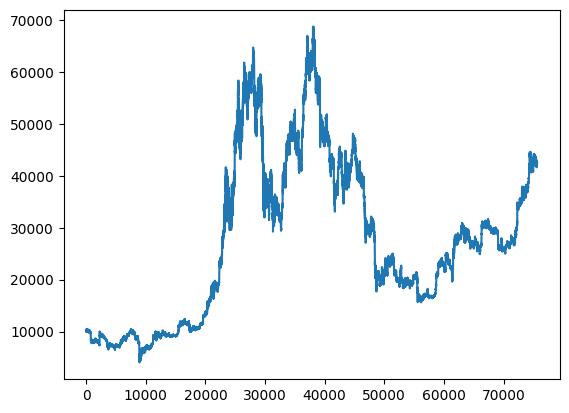

In [9]:
plt.plot(price.values)  

In [11]:
def count_signals(signals):
    count_1 = 0
    count_minus_1 = 0

    # Iterate through each nested list in the signals
    for signal_list in signals:
        for signal in signal_list:
            # Check for occurrence of 1 or -1
            if signal == 1:
                count_1 += 1
            elif signal == -1:
                count_minus_1 += 1

    return count_1, count_minus_1


In [14]:
def count_signalsele(signals):
    count_1 = 0
    state = -1

    for signal in signals:
        val = assign_val(signal)
        if val == 1 and state == -1:
            count_1 += 1
            state = 1
        elif val == -1 and state == 1:
            count_1 += 1
            state = -1
    
    return count_1


def assign_val(signal):
    #finding the number of 1s in the list
    count_0 = 0
    count_1 = 0
    
    for a in signal:
        if(a == 1):
            count_1 += 1
        elif (a == -1):
            count_0 += 1

    if(count_1 == 0 and count_0 == 0):
        return 0
    elif(count_1 > count_0):
        return 1
    else:
        return -1
  

In [17]:
#main function

def detect_harmonic_pattern(data, order_dec=5, err_allowed=0.1):
    price = data.close.copy()

    signals = []


    for i in range(100, len(price)):
        patterns_signals = []
        current_idx, current_pat = extract_extremes(price.values, i, order_dec)

        #butterfly retractment patterns
        butterfly_signal= identify_butterfly_patterns(current_idx, current_pat, err_allowed)
        patterns_signals.append(butterfly_signal)
        # patterns_bullish_total_butterfly.append(patterns_bullish)

        #gratley retractment patterns;

        signal = identify_grately_patterns(current_idx, current_pat, err_allowed)
        patterns_signals.append(signal)
        # patterns_bullish_total_grately.append(patterns_bullish)
        
        #cypher retractment patterns

        signal= identify_cypher_patterns(current_idx, current_pat, err_allowed)
        patterns_signals.append(signal)
        # patterns_bullish_total_cypher.append(patterns_bullish)

        #bat retractment patterns

        signal = identify_bat_patterns(current_idx, current_pat, err_allowed)
        patterns_signals.append(signal)
        # patterns_bullish_total_bat.append(patterns_bullish)

        #altbat retractment patterns

        signal = identify_altbat_patterns(current_idx, current_pat, err_allowed)
        patterns_signals.append(signal)
        # patterns_bullish_total_altbat.append(patterns_bullish)

        #crab retractment patterns

        signal = identify_crab_patterns(current_idx, current_pat, err_allowed)
        patterns_signals.append(signal)
        # patterns_bullish_total_crab.append(patterns_bullish)

        #deepcrab retractment patterns

        signal= identify_deepcrab_patterns(current_idx, current_pat, err_allowed)
        patterns_signals.append(signal)
        # patterns_bullish_total_deepcrab.append(patterns_bullish)

        #shark retractment patterns

        signal = identify_shark_patterns(current_idx, current_pat, err_allowed)
        patterns_signals.append(signal)
        # patterns_bullish_total_shark.append(patterns_bullish)

        #white swan retractment patterns -> very less effective in testing

        signal= identify_wswan_patterns(current_idx, current_pat, err_allowed)
        patterns_signals.append(signal)
        # patterns_bullish_total_wswan.append(patterns_bullish)


        #black swan retractment patterns

        signal = identify_bswan_patterns(current_idx, current_pat, err_allowed)
        patterns_signals.append(signal)
        # patterns_bullish_total_bswan.append(patterns_bullish)

        signals.append(patterns_signals)
    
    return signals

# # Usage
# signals = detect_harmonic_pattern(data, order_dec=3, err_allowed=0.1)

for a in range(3, 6):
    print(count_signalsele(detect_harmonic_pattern(data, order_dec=a, err_allowed=0.1)))
    #testing for all the data

1148
935
793


In [28]:
#training a neural network to generate the next movement;

